<a href="https://colab.research.google.com/github/giovannaily/Deep_Learn/blob/main/CNN_comparation_car_brand_logos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade Federal de Pernambuco - UFPE \
Centro de Informática - CIn \
Ciência da computação - Pós graduação \
Deep Learn 2024.1 \
Student: Giovanna Ily Farias Ramalho

# Challenge 1 - RN and CNN comparation

# Redes Neurais Convolucionais

In the previous section, we built and trained a simple model to classify gemstone images. The model did not perform as well in both the training and validation sets. This behavior is known as [underfitting](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html). In this section, we introduce a popular model type called [convolutional neural network](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53). This model is especially good at reading images and classifying them.

# Goals
* Prepare data specifically for a CNN
* Create a more sophisticated CNN model and understand a greater variety of model layers
* Train a CNN model and observe its performance

In [ ]:
# Import librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split

# Data vizualization

In [ ]:
# Reading the data
data = pd.read_csv('/content/drive/MyDrive/Car_Brand_Logos/gems_expanded.csv')
data = np.array(data)

In [ ]:
# Shuffling the instances
np.random.seed(42)
np.random.shuffle(data)

In [ ]:
# Separating data and labels
x = data[:, :-1]
y = data[:, -1]

# Separating training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, stratify=y, shuffle=True, random_state=42)

In [ ]:
# Performing coding of categories
num_classes = 88

y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [ ]:
# Normalization
x_train = x_train/255.0
x_val = x_val/255.0

# Reformatting images for a CNN

In the last exercise, the individual figures in our dataset were in the format of long lists of 30000 pixels:

In [ ]:
x_train.shape, x_val.shape

((2017, 30000), (505, 30000))

In this format, we do not have all the information about which pixels are close to each other. Because of this, we cannot apply convolutions that will detect features. Let's reformat our dataset so that it has a 100x100 pixel format. This will allow our convolutions to associate groups of pixels and detect important attributes.

Note that for the first convolutional layer of our model, we need to not only have the height and width of the image, but also the number of [color channels](https://www.photoshopessentials.com/essentials/rgb/). Our images are in RGB system, so we have all 3 channels.

This means we need to convert the current format `(3520, 30000)` to `(3520, 100, 100, 3)`. For convenience, we will pass the [reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html#numpy.reshape) method a `-1` for any dimension we want to keep unchanged. Like this:

In [ ]:
x_train = x_train.reshape(-1,100,100,3)
x_val = x_val.reshape(-1,100,100,3)

In [ ]:
x_train.shape, x_val.shape

((2017, 100, 100, 3), (505, 100, 100, 3))

# creating a convolutional model

I will start my projects by borrowing model properties from a similar project. Assuming this problem is not unique, there is a good chance that people have created well-performing models and posted them to online repositories like [TensorFlow Hub](https://www.tensorflow.org/hub) and the [NGC Catalog ](https://ngc.nvidia.com/catalog/models). Today, we will provide a template that will serve this problem well.

<!--<img src="https://drive.google.com/uc?id=1WeMvcGJiRLmXCsp6kwozb-7slhHboooq" width=180 />-->
<img src="CNN.png" width=180 />

In this activity, we cover many of the different types of layers that exist.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential() # Instanciamento do modelo
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu",
                 input_shape=(100, 100, 3))) # Camada de entrada
model.add(BatchNormalization()) # Normalização em lote
model.add(MaxPool2D((2, 2), strides=2, padding="same")) # Max pooling
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu")) # Camada convolucional
model.add(Dropout(0.2)) # Descarte de neurônios
model.add(BatchNormalization()) # Normalização em lote
model.add(MaxPool2D((2, 2), strides=2, padding="same")) # Max pooling
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu")) # Camada convolucional
model.add(BatchNormalization()) # Normalização em lote
model.add(MaxPool2D((2, 2), strides=2, padding="same")) # Max pooling
model.add(Flatten()) # Achatamento
model.add(Dense(units=512, activation="relu")) # Camada inteiramente conectada
model.add(Dropout(0.3)) # Descarte de neurônios
model.add(Dense(units=num_classes, activation="softmax")) # Camada de saída

# two-dimensional convolutional layers

<!--<img src="https://drive.google.com/uc?id=1f4iuQX4IBOKW1bCAs9O_MTP-bqBlj-aQ" width=300 />-->
<img src="Conv2D.png" width=300 />

These are my two-dimensional convolutional layers. Small kernels go over the input image and detect features important for classification. The model's first convolutions detect simple attributes like lines. Further convolutions will detect more complex features.
```Python
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same'...)
```
75 refers to the number of filters that will be learned. (3,3) refers to the size of these filters. *Stride* refers to the step that the filter will advance as it traverses the image. *Padding* refers to whether or not the output image that will be created from the filter will be the same size as the input image.

### [BatchNormalization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization)
Like input normalization, batch normalization resizes values ​​in hidden layers to improve training.

### [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)

<img src="https://drive.google.com/uc?id=1V0KkSlK9mSrJJLSt6dZM-dN1ciUJJYH2" width=300 />

*Max pooling* takes an image and essentially shrinks it to a lower resolution. This is done to help the model become more robust to translational transformation (objects moving from one side to the other), and it also makes the model faster.

### [Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)

<img src="https://drive.google.com/uc?id=1Xd4HFauuDicUANuPu-sgTuUOjJ_Rhnat" width=360 />

*Dropout* is a technique to prevent overfitting. *dropout* randomly selects a subset of neurons and turns them off, so that they do not participate in backward or forward propagation at that particular time. This helps ensure that the network is robust and redundant, and that it does not rely on any one area to find answers.

### [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten)

*flatten* takes the output of a layer that is multidimensional, and flattens it into a one-dimensional vector. The output is called a feature vector and will be connected to the final classification layer.

### [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)

We have seen dense (fully connected) layers in previous models. Our first dense layer (512 units) takes the feature vector as input and learns which features will contribute to a particular classification. The second dense layer (24 units) is the final classification layer that returns us a prediction.

## Model Summary

Convolutional models can help extract useful information from images, and can be used in classification tasks.

Here, we have a summary of the model we created. It has fewer trainable parameters than the model in the previous notebook:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 75)      2100      
                                                                 
 batch_normalization (Batch  (None, 100, 100, 75)      300       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 75)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 50, 50, 50)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 50, 50, 50)        2

## Compiling the model

In [ ]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

## Training the model

Despite the very different architecture, the training is exactly the same. Let's run the model for 20 epochs and see if the accuracy improves compared to the previous model:

In [ ]:
history = model.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_val, y_val))

Epoch 1/20
64/64 [==============================] - 123s 2s/step - loss: 4.2875 - accuracy: 0.2514 - val_loss: 3.1779 - val_accuracy: 0.1208
Epoch 2/20
64/64 [==============================] - 113s 2s/step - loss: 1.6721 - accuracy: 0.4859 - val_loss: 2.5617 - val_accuracy: 0.1980
Epoch 3/20
64/64 [==============================] - 114s 2s/step - loss: 1.1382 - accuracy: 0.6495 - val_loss: 3.4053 - val_accuracy: 0.1802
Epoch 4/20
64/64 [==============================] - 108s 2s/step - loss: 0.7670 - accuracy: 0.7501 - val_loss: 2.7195 - val_accuracy: 0.3347
Epoch 5/20
64/64 [==============================] - 115s 2s/step - loss: 0.5021 - accuracy: 0.8309 - val_loss: 3.5073 - val_accuracy: 0.3545
Epoch 6/20
64/64 [==============================] - 115s 2s/step - loss: 0.3594 - accuracy: 0.8820 - val_loss: 1.8634 - val_accuracy: 0.5485
Epoch 7/20
64/64 [==============================] - 113s 2s/step - loss: 0.2382 - accuracy: 0.9222 - val_loss: 1.6573 - val_accuracy: 0.5881
Epoch 8/20
64

## graph of training and validation loss.

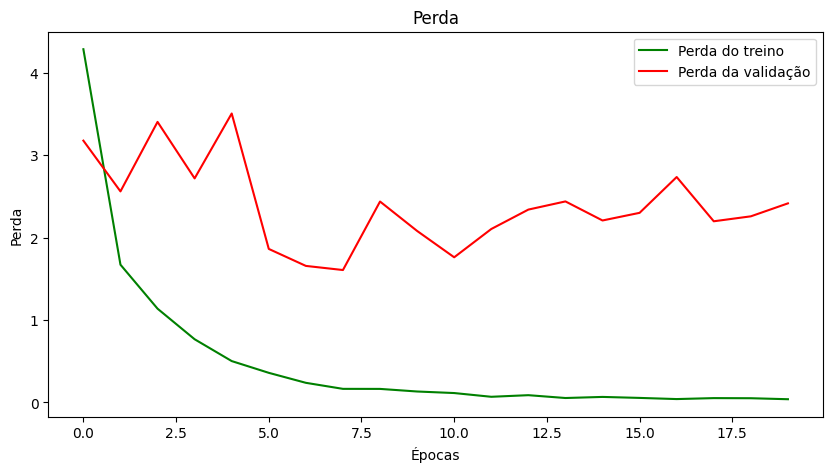

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(history.epoch, history.history["loss"], 'g', label='Perda do treino')
ax.plot(history.epoch, history.history["val_loss"], 'r', label='Perda da validação')
ax.set_title('Perda')
ax.set_xlabel('Épocas')
ax.set_ylabel('Perda')
ax.legend()
plt.show()

# Conclusion

The results obtained with the CNN for the classification of car brand logos showed positive learning progress over 20 epochs, culminating in a training accuracy of 99.11% and a validation accuracy of 68.32%. These results indicate that the network was effectively able to learn the characteristics of the training data, although it showed clear signs of overfitting, evidenced by the discrepancy between the training and validation accuracies. This suggests an excessive specialization in the training data, compromising the ability to generalize to new data.

In comparison, the network using the ReLU activation function achieved significantly lower results, with a maximum training accuracy of 33.71% and validation accuracy of 21.39%. The improvement in accuracy over the epochs was more moderate, and the overall performance suggests difficulties in both effectively learning the data characteristics and in generalization. However, the ReLU network demonstrated a smaller discrepancy between the training and validation accuracies, indicating less overfitting compared to the first CNN, despite its lower overall accuracy.

In terms of satisfaction with the results, the CNN performed better, especially in relation to the accuracy on the training set. However, the observed overfitting signals the need for adjustments to improve generalization. The ReLU network, on the other hand, requires significant improvements in both learning capability and accuracy, possibly through revisions in the architecture, data preprocessing, and the application of data augmentation and regularization techniques.

In summary, while the CNN showed greater potential for the task of classifying car brand logos, both models require adjustments to achieve a balance between effective learning and generalization capability. Implementing techniques to combat overfitting in the CNN and improvements in the architecture and data treatment for the ReLU network are critical steps to optimizing performance.